In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/ML/13_kmeans/income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


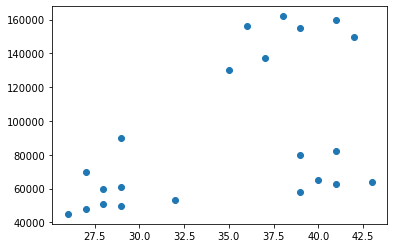

In [3]:
plt.scatter(df['Age'],df['Income($)'])

In [4]:
km=KMeans(n_clusters=3)
y_predictions=km.fit_predict(df[['Age','Income($)']])
y_predictions


array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

In [5]:
df['clusters']=y_predictions
df.head()

,Name,Age,Income($),clusters
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


In [6]:
km.cluster_centers_

array([[3.40000000e+01, 8.05000000e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.29090909e+01, 5.61363636e+04]])

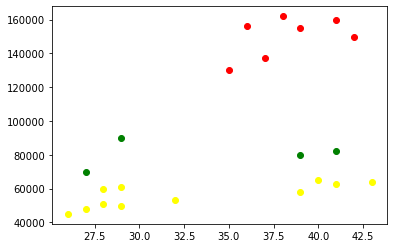

In [7]:
df1=df[df['clusters']==0]
df2=df[df['clusters']==1]
df3=df[df['clusters']==2]
plt.scatter(df1['Age'],df1['Income($)'],color='green')
plt.scatter(df2['Age'],df2['Income($)'],color='red')
plt.scatter(df3['Age'],df3['Income($)'],color='yellow')

In [8]:
# here we get some miss alaining of clusters. this is due to scaling of the plot and we need to change it 



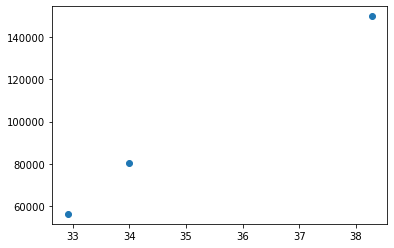

In [9]:
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1])

In [10]:
scaler=MinMaxScaler()

In [11]:
df['Income($)']= scaler.fit_transform(df[['Income($)']])
df['Age']=scaler.fit_transform(df[['Age']])

In [12]:
df.head()

,Name,Age,Income($),clusters
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1


In [13]:
df.head()

,Name,Age,Income($),clusters
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1


In [14]:
km2=KMeans(n_clusters=3)
y_predicted=km2.fit_predict(df[['Age','Income($)']])
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),clusters,cluster
0,Rob,0.058824,0.213675,0,0
1,Michael,0.176471,0.384615,0,0
2,Mohan,0.176471,0.136752,2,0
3,Ismail,0.117647,0.128205,2,0
4,Kory,0.941176,0.897436,1,2


In [15]:
km2.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ],
       [0.72268908, 0.8974359 ]])

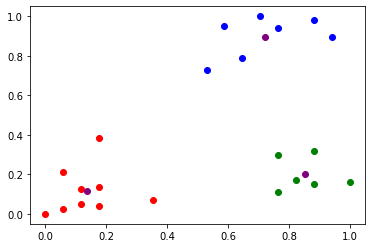

In [16]:
df_1=df[df['cluster']==0]
df_2=df[df['cluster']==1]
df_3=df[df['cluster']==2]
plt.scatter(df_1['Age'],df_1['Income($)'],color='red')
plt.scatter(df_2['Age'],df_2['Income($)'],color='green')
plt.scatter(df_3['Age'],df_3['Income($)'],color='blue')

plt.scatter(km2.cluster_centers_[:,0],km2.cluster_centers_[:,1],color='purple')

C:\Users\M RAJESH\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


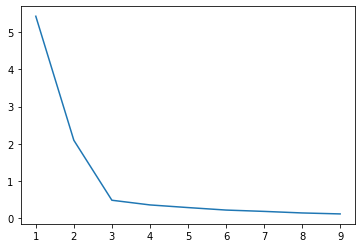

In [17]:
sse=[]
k_rng = range(1,10)
for i in (k_rng):
    km1=KMeans(n_clusters=i)
    km1.fit(df[['Age','Income($)']])
    sse.append(km1.inertia_)
plt.plot(k_rng,sse)

In [18]:
#============= EXERCISE =============

In [19]:
from sklearn.datasets import load_iris
ld=load_iris()


In [20]:
iris=pd.DataFrame(ld.data,columns=ld.feature_names)
iris=iris[['sepal length (cm)','sepal width (cm)']]
iris.head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


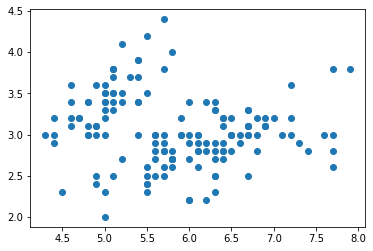

In [21]:
plt.scatter(iris['sepal length (cm)'],iris['sepal width (cm)'])

In [22]:
km3=KMeans(n_clusters=3)
y_predicted=km3.fit_predict(iris[['sepal length (cm)','sepal width (cm)']])
iris['clusters'] =y_predicted
iris1=iris
iris1.head()

,sepal length (cm),sepal width (cm),clusters
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0


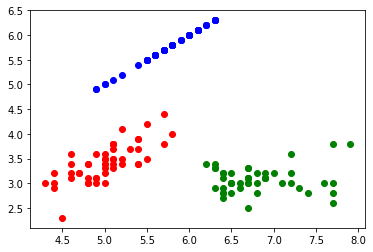

In [23]:
iris0=iris1[iris1['clusters']==0]
iris2=iris1[iris1['clusters']==1]
iris3=iris1[iris1['clusters']==2]
plt.scatter(iris0['sepal length (cm)'],iris0['sepal width (cm)'],color='red')
plt.scatter(iris2['sepal length (cm)'],iris2['sepal width (cm)'],color='green')
plt.scatter(iris3['sepal length (cm)'],iris3['sepal length (cm)'],color='blue')

In [24]:
km3.cluster_centers_

array([[5.006     , 3.428     ],
       [6.81276596, 3.07446809],
       [5.77358491, 2.69245283]])